* 나이븝 베이즈는 베이즈 정리를 적용한 조건부 확률 기반의 분류 모델이다. 여기서 조건부 확률은 A가 일어났을 때 B가 일어날 확률을 의미한다. 범용성이 높지는 않지만 독립변수들이 모두 독립적이면 충분히 경쟁력 있는 알고리즘이다.  
* 장점  
    * 비교적 간단한 알고리즘에 속하며 속도 또한 빠르다.
    * 작은 훈련셋으로도 잘 예측한다.
* 단점
    * 모든 독립변수가 각각 독립적임을 전제로 하는데 이는 장점이 되기도 하고 단점이 되기도 한다. 실제로 독립변수들이 모두 독립적이라면 다른 알고리즘보다 우수할 수 있지만, 실제 데이터에서 그런 경우가 많지 않기 때문에 단점이 되기도 한다.

## 7.1 문제 정의
  
* 미션 : 문자 데이터셋을 이용해 스팸 여부를 판단하라.
* 문제 유형 : 분류
* 평가지표: 정확도, 혼동행렬

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data = pd.read_csv(file_url)

In [2]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

## 7.3 전처리 : 특수 기호 제거하기

In [4]:
import string

In [5]:
string.punctuation # 특수 기호 목록 출력

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
sample_string = data['text'].loc[0]
sample_string

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
for i in sample_string:
    print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [8]:
for i in sample_string:
    if i not in string.punctuation:
        print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [9]:
new_string = []
for i in sample_string:
    if i not in string.punctuation:
        new_string.append(i)

In [10]:
new_string

['G',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'A',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'u',
 'g',
 'i',
 's',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'l',
 'a',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 't',
 ' ',
 'C',
 'i',
 'n',
 'e',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'a',
 'm',
 'o',
 'r',
 'e',
 ' ',
 'w',
 'a',
 't']

In [11]:
new_string = []
for i in sample_string:
    if i not in string.punctuation:
        new_string.append(i)
new_string = ''.join(new_string)

In [12]:
new_string

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [13]:
def remove_punc(x):
    new_string = []
    for i in x:
        if i not in string.punctuation:
            new_string.append(i)
    new_string = ''.join(new_string)
    return new_string

In [14]:
remove_punc(sample_string)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [15]:
data['text'].apply(remove_punc)

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [16]:
data['text'] = data['text'].apply(remove_punc) # 데이터셋 업데이트

## 7.4 전처리 : 불용어 제거하기

In [17]:
import nltk
nltk.download('stopwords') # 불용어 목록 가져오기

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanghui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords # 불용어 목록 임포트

In [19]:
stopwords.words('english') # 영어 불용어 선택

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
sample_string = data['text'].loc[0]
sample_string.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [21]:
for i in sample_string.split():
    if i not in stopwords.words('english'):
        print(i)

Go
jurong
point
crazy
Available
bugis
n
great
world
la
e
buffet
Cine
got
amore
wat


In [22]:
for i in sample_string.split():
    if i.lower() not in stopwords.words('english'):
        print(i.lower())


go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


In [23]:
new_string = []
for i in sample_string.split():
    if i.lower() not in stopwords.words('english'):
        new_string.append(i.lower())

new_string = ' '.join(new_string)
new_string

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [24]:
def stop_words(x):
    new_string = []
    for i in x.split():
        if i.lower not in stopwords.words('english'):
            new_string.append(i.lower())
    new_string = ' '.join(new_string)
    return new_string

data['text'] = data['text'].apply(stop_words)
data['text']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5569    this is the 2nd time we have tried 2 contact u...
5570                  will ü b going to esplanade fr home
5571    pity was in mood for that soany other suggestions
5572    the guy did some bitching but i acted like id ...
5573                            rofl its true to its name
Name: text, Length: 5574, dtype: object

#

In [26]:
data['text'][:5]

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup fina...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: text, dtype: object

## 7.5 전처리 : 목표 컬럼 형태 변경하기

In [27]:
data['target'] = data['target'].map({'spam': 1, 'ham': 0})
data['target'][:10]

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: target, dtype: int64

In [28]:
x = data['text']
y = data['target']

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv = CountVectorizer()
cv.fit(x)
cv.vocabulary_

{'go': 3822,
 'until': 8779,
 'jurong': 4734,
 'point': 6501,
 'crazy': 2518,
 'available': 1427,
 'only': 6094,
 'in': 4444,
 'bugis': 1901,
 'great': 3919,
 'world': 9288,
 'la': 4895,
 'buffet': 1899,
 'cine': 2235,
 'there': 8352,
 'got': 3879,
 'amore': 1188,
 'wat': 9040,
 'ok': 6054,
 'lar': 4934,
 'joking': 4702,
 'wif': 9180,
 'oni': 6088,
 'free': 3606,
 'entry': 3188,
 'wkly': 9239,
 'comp': 2351,
 'to': 8477,
 'win': 9195,
 'fa': 3324,
 'cup': 2574,
 'final': 3450,
 'tkts': 8466,
 '21st': 454,
 'may': 5384,
 '2005': 441,
 'text': 8291,
 '87121': 875,
 'receive': 6901,
 'questionstd': 6792,
 'txt': 8680,
 'ratetcs': 6844,
 'apply': 1277,
 '08452810075over18s': 71,
 'dun': 3037,
 'say': 7261,
 'so': 7682,
 'early': 3059,
 'hor': 4263,
 'already': 1160,
 'then': 8346,
 'nah': 5736,
 'dont': 2943,
 'think': 8374,
 'he': 4077,
 'goes': 3836,
 'usf': 8832,
 'lives': 5098,
 'around': 1329,
 'here': 4137,
 'though': 8395,
 'freemsg': 3614,
 'hey': 4156,
 'darling': 2638,
 'its': 46

In [31]:
x = cv.transform(x)
print(x)

  (0, 1188)	1
  (0, 1427)	1
  (0, 1899)	1
  (0, 1901)	1
  (0, 2235)	1
  (0, 2518)	1
  (0, 3822)	1
  (0, 3879)	1
  (0, 3919)	1
  (0, 4444)	1
  (0, 4734)	1
  (0, 4895)	1
  (0, 6094)	1
  (0, 6501)	1
  (0, 8352)	1
  (0, 8779)	1
  (0, 9040)	1
  (0, 9288)	1
  (1, 4702)	1
  (1, 4934)	1
  (1, 6054)	1
  (1, 6088)	1
  (1, 9180)	1
  (2, 71)	1
  (2, 441)	1
  :	:
  (5572, 1937)	1
  (5572, 2814)	1
  (5572, 3131)	1
  (5572, 3555)	1
  (5572, 3606)	1
  (5572, 3732)	1
  (5572, 3981)	1
  (5572, 4077)	1
  (5572, 4385)	1
  (5572, 4444)	1
  (5572, 4524)	1
  (5572, 4585)	1
  (5572, 5048)	1
  (5572, 5831)	1
  (5572, 7698)	1
  (5572, 7709)	1
  (5572, 8329)	1
  (5572, 8477)	1
  (5572, 8822)	1
  (5572, 9090)	1
  (5573, 4606)	2
  (5573, 5742)	1
  (5573, 7120)	1
  (5573, 8477)	1
  (5573, 8626)	1


In [32]:
data.loc[0]['text']

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [33]:
print(cv.vocabulary_['go'])
print(cv.vocabulary_['jurong'])
print(cv.vocabulary_['point'])

3822
4734
6501


## 7.7 모델링 및 예측/평가하기

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
accuracy_score(y_test, pred)

0.9802690582959641

In [39]:
print(confusion_matrix(y_test, pred))

[[960  17]
 [  5 133]]


<AxesSubplot:>

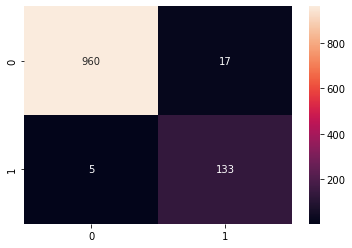

In [40]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.0f')

* 1종 오류: 실제 음성인 것을 양성으로 예측하는 오류
* 2종 오류: 실제 양성인 것을 음성으로 예측하는 오류

## 7.8 이해하기 : 나이브 베이즈 모델

$P(A|B) = P(B|A)P(A) \over P(B)$
  
* $P(A|B)$ :  사후확률. B가 발생했을 때 A가 발생할 확률. 스팸 문자의 경우 B라는 특정 단어가 등장했을 때 A가 스팸문자일 확률
* $P(A)$ : 사전확률. B의 발생 유무와 관계 없이 기본적으로 A가 발생할 확률. 여기서는 전체 문자 중 스팸 문자의 비율.
* $P(B|A)$ : 우도(likelihood) 혹은 가능도. A가 발생했을 때 B가 발생할 확률. 스팸 메일인 경우 B라는 특정 단어가 있을 확률
* $P(B)$ : 전체에서 B가 발생할 확률. 전체 문자에서 B라는 특정 단어가 들어 있을 확률

  
* 베이즈 정리 : 두 확률 변수의 사전확률과 사후 확률 사이의 관계를 나타내는 정리로, 사후확률을 구할 때 쓰임